In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from sklearn.model_selection import train_test_split
import sys


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-income-dataset/adult.csv


In [2]:
df = pd.read_csv("/kaggle/input/adult-income-dataset/adult.csv",encoding='latin1')
print(df.shape)

(48842, 15)


In [3]:
print(df.head(n=10))

   age         workclass  fnlwgt     education  educational-num  \
0   25           Private  226802          11th                7   
1   38           Private   89814       HS-grad                9   
2   28         Local-gov  336951    Assoc-acdm               12   
3   44           Private  160323  Some-college               10   
4   18                 ?  103497  Some-college               10   
5   34           Private  198693          10th                6   
6   29                 ?  227026       HS-grad                9   
7   63  Self-emp-not-inc  104626   Prof-school               15   
8   24           Private  369667  Some-college               10   
9   55           Private  104996       7th-8th                4   

       marital-status         occupation   relationship   race  gender  \
0       Never-married  Machine-op-inspct      Own-child  Black    Male   
1  Married-civ-spouse    Farming-fishing        Husband  White    Male   
2  Married-civ-spouse    Protective-serv

In [4]:
#Finding the null values here
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

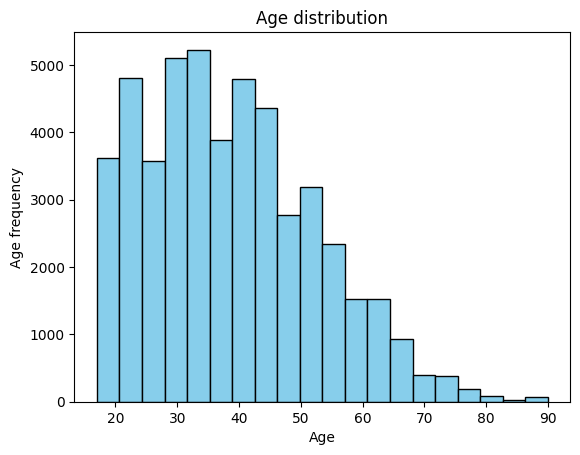

In [5]:
#Histogram for age
plt.hist(df.age,bins=20,color='skyblue',edgecolor='black')
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Age frequency')
plt.show()

In [6]:
#Handling workclass column
missing_value = (df['workclass'] == '?').sum()
unique_values = df['workclass'].unique()
print(unique_values)
print(missing_value)

['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
2799


In [7]:
#Handling all categorical features
categorical_features = ['workclass','marital-status','occupation','relationship','race','gender','native-country']

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_array = encoder.fit_transform(df[categorical_features])
ecoded_df = pd.DataFrame(encoded_array,columns=encoder.get_feature_names_out())
df = pd.concat([df.drop(columns=categorical_features),ecoded_df],axis=1)
print(df)

       age  fnlwgt     education  educational-num  capital-gain  capital-loss  \
0       25  226802          11th                7             0             0   
1       38   89814       HS-grad                9             0             0   
2       28  336951    Assoc-acdm               12             0             0   
3       44  160323  Some-college               10          7688             0   
4       18  103497  Some-college               10             0             0   
...    ...     ...           ...              ...           ...           ...   
48837   27  257302    Assoc-acdm               12             0             0   
48838   40  154374       HS-grad                9             0             0   
48839   58  151910       HS-grad                9             0             0   
48840   22  201490       HS-grad                9             0             0   
48841   52  287927       HS-grad                9         15024             0   

       hours-per-week incom

In [8]:
df = df.drop(columns=['educational-num'])
education_unique = df['education'].unique()
print(education_unique)

education_order = {
    'Preschool': 1,
    '1st-4th': 2,
    '5th-6th': 3,
    '7th-8th': 4,
    '9th': 5,
    '10th': 6,
    '11th': 7,
    '12th': 8,
    'HS-grad': 9,
    'Some-college': 10,
    'Assoc-voc': 11,
    'Assoc-acdm': 12,
    'Bachelors': 13,
    'Masters': 14,
    'Prof-school': 15,
    'Doctorate': 16
}

order_education = df['education'].map(education_order)
df['education'] = order_education/max(education_order.values())


['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']


In [9]:
#Normalising numerical columns
scaler = MinMaxScaler()
numerical_col = ['fnlwgt','capital-gain','capital-loss','hours-per-week']

df[numerical_col] = scaler.fit_transform(df[numerical_col])

In [10]:
y = df['income']
X = df.drop(columns=['income'])

In [11]:
print(X[:10])
print(y[:10])

   age    fnlwgt  education  capital-gain  capital-loss  hours-per-week  \
0   25  0.145129     0.4375      0.000000           0.0        0.397959   
1   38  0.052451     0.5625      0.000000           0.0        0.500000   
2   28  0.219649     0.7500      0.000000           0.0        0.397959   
3   44  0.100153     0.6250      0.076881           0.0        0.397959   
4   18  0.061708     0.6250      0.000000           0.0        0.295918   
5   34  0.126112     0.3750      0.000000           0.0        0.295918   
6   29  0.145280     0.5625      0.000000           0.0        0.397959   
7   63  0.062472     0.9375      0.031030           0.0        0.316327   
8   24  0.241782     0.6250      0.000000           0.0        0.397959   
9   55  0.062722     0.2500      0.000000           0.0        0.091837   

   workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0                    0.0                  0.0                     0.0   
1                    0.0    

In [16]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

def cosine(x1,x2):
    dot_product = np.dot(x1,x2)
    x1_mag = np.sqrt(np.sum(x1**2))
    x2_mag = np.sqrt(np.sum(x2**2))
    return dot_product/(x1_mag*x2_mag)

def majority_voting(self,distances):
    k_indices = np.argsort(distances)[:self.k]
    y_labels = [self.y[i] for i in k_indices]
    most_common = Counter(y_labels).most_common(1)
    return most_common[0][0]

def inverse_distance(self,distances):
    epsilon = sys.float_info.epsilon
    distances = np.array(distances)
    inverse_distance_weight = 1/(distances+epsilon)
    k_indices = np.argsort(inverse_distance_weight)[::-1][:self.k]
    y_labels = [self.y[i] for i in k_indices]
    y_labels_weight = [inverse_distance_weight[i] for i in k_indices]
    dict_y = {}
    for index in range(len(y_labels)):
        item = y_labels[index]
        dict_y[item] = dict_y.get(item, 0) + y_labels_weight[index] 
    key_max = max(dict_y,key = dict_y.get)
    return key_max

def inverse_linear_distance(self,distances):
    epsilon = sys.float_info.epsilon
    k_indices = np.argsort(distances)[:self.k]
    nearest_distances = [distances[i] for i in k_indices]
    max_distance = max(nearest_distances)
    min_distance = min(nearest_distances)
    y_labels = [self.y[i] for i in k_indices]
    dict_weight = {}
    for index in range(len(y_labels)):
        class_label = y_labels[index]
        inverse_distance = (max_distance - nearest_distances[index])/(nearest_distances[index] - min_distance + epsilon)
        dict_weight[class_label] = dict_weight.get(class_label,0) + inverse_distance
    key_max = max(dict_weight,key=dict_weight.get)
    
    return key_max

class KNN:
    
    def __init__(self,k=3):
        self.k = k

    def fit(self,X,y):
        self.X = np.array(X)
        self.y = np.array(y)

    def predict(self,X):
        X = np.array(X)
        predictions_labels = [self._predict(x) for x in X]
        return np.array(predictions_labels)

    def _predict(self,x):
        distances = [euclidean_distance(x,x_train) for x_train in self.X]
        return inverse_linear_distance(self, distances)
        
        

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1234)

clf = KNN(3)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test[:10])

accuracy = np.sum(predictions == y_test[:10])/ len( y_test[:10])
print("Accuracy is:",accuracy*100)


Accuracy is: 90.0
